In [1]:
import math
import torch
from blr_loss import BLRModel, features, post_cov, log_likelihood, NormalHessianProd
import hess
from hess.utils import gradtensor_to_tensor
import numpy as np

import matplotlib.pyplot as plt

In [2]:
sig = 1
nx = 500
P = 200

x = torch.linspace(0, 50, nx)
phi = features(x, p=P)

In [3]:
def response(phi, sig=1.):
    alpha = torch.randn(phi.size(-1))
    y = phi.matmul(alpha)
    y = y + torch.randn(y.shape)*sig
    return y

In [4]:
y = response(phi, sig)

In [5]:
order_to_add = np.random.permutation(nx)

In [9]:
keepers = []
eigs = torch.zeros(nx, P)
hessians = torch.zeros(nx, P, P)
for ii, idx in enumerate(order_to_add):
    keepers.append(idx)
    print(keepers)
    for pp in range(P):
#         base_vec = torch.zeros(P).unsqueeze(0)
#         base_vec[0, pp] = 1.
#         NormalHessianProd(base_vec, model, log_likelihood, inputs=x[keepers], 
#                           targets=y[keepers], sig=sig, use_cuda=use_cuda)
        phi = features(x[keepers], p=P)
        hessians[ii, :, pp] = post_cov(phi, sig, prior_cov).inverse()
        
    

[154]
[154, 431]
[154, 431, 283]
[154, 431, 283, 399]
[154, 431, 283, 399, 321]
[154, 431, 283, 399, 321, 80]
[154, 431, 283, 399, 321, 80, 281]
[154, 431, 283, 399, 321, 80, 281, 364]
[154, 431, 283, 399, 321, 80, 281, 364, 370]
[154, 431, 283, 399, 321, 80, 281, 364, 370, 318]
[154, 431, 283, 399, 321, 80, 281, 364, 370, 318, 490]


KeyboardInterrupt: 

In [10]:
n_done = 10
e_vals = torch.zeros(P, n_done)
eff_dim = torch.zeros(n_done)
for mat in range(n_done):
    ev, _ = np.linalg.eig(hessians[mat, :, :].detach())
    e_vals[:, mat] = torch.tensor(np.real(ev))
    eff_dim[mat] = torch.sum(e_vals[:, mat].div(e_vals[:, mat] + 0.1))

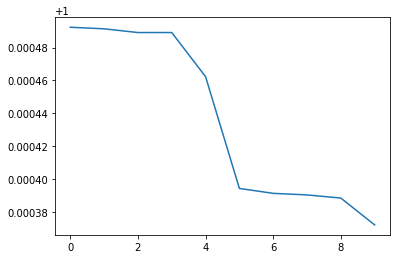

In [11]:
plt.plot(eff_dim)

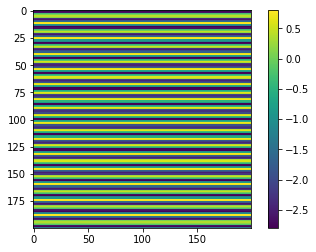

In [12]:
plt.imshow(hessians[0, :, :])
plt.colorbar()